In [103]:
import matplotlib.pyplot as plt

def calculate_probability(z,m): #O(1)
    '''
    p(z=⬜|⬜) = 0.6, p(z=⬛|⬜) = 0.4
    p(z=⬛|⬛) = 0.7, p(z=⬜|⬛) = 0.3
    '''
    if m == "⬜":
        if z == "⬜":
            w = 0.6
        else: # z == "⬛"
            w = 0.4
    else: #m == "⬛"
        if z=="⬛":
            w = 0.7
        else: # z == "⬜"
            w = 0.3
    return w

def update_histogram(h,z,M): #O(2 * len(M))
    hnew = h.copy()
    for i in range(len(h)):
            hnew[i] = h[i-1] * calculate_probability(z,M[i])
    #normalize
    N = sum(hnew)
    for i in range(len(hnew)):
        hnew[i] = hnew[i]/N
    return hnew

def build_histogram(z,M): #O(len(z) * len(M))
    h=[1/len(M)]*len(M)
    for i in range(len(z)):
        h = update_histogram(h,z[i],M)
    return h

def compute_solution_probability(max_idx,z,M):
    p = 1
    for i,zi in enumerate(z):
        x = (max_idx+i+1) % len(M)
        p *= calculate_probability(zi,M[x])
    return p

def find_maximum(lst): #O(len(lst))
    max = 0
    idx = 0
    for i,val in enumerate(lst):
        if val>max:
            max = val
            idx = i
    return idx, max

def show_histogram(bins,values):
    plt.bar(bins,values)
    plt.show()

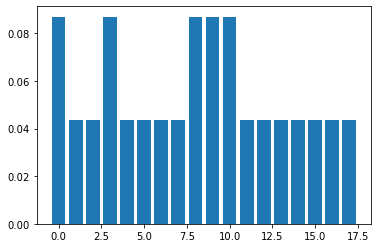

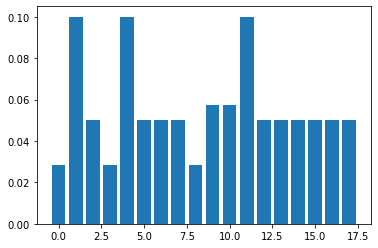

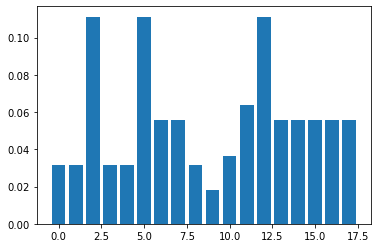

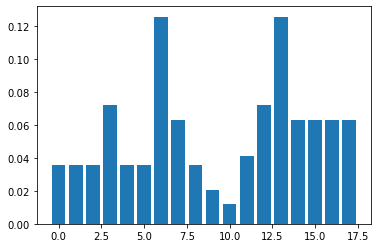

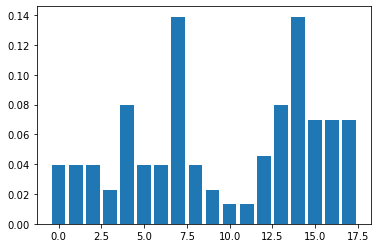

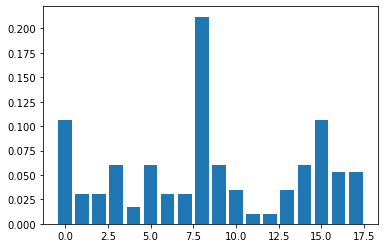

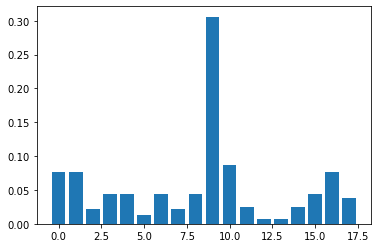

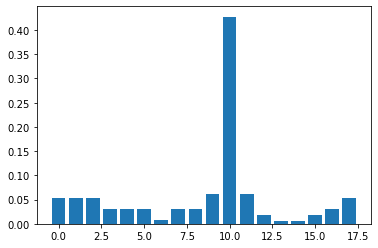

In [104]:
M = ["⬜","⬛","⬛","⬜","⬛","⬛","⬛","⬛","⬜","⬜","⬜","⬛","⬛","⬛","⬛","⬛","⬛","⬛"]
z = ["⬜","⬛","⬛","⬛","⬛","⬜","⬜","⬜"]

# M = ["⬜","⬜","⬜","⬜","⬜","⬜","⬜","⬜","⬜","⬜","⬜","⬜"]
# z = ["⬜","⬜","⬜","⬜"]

# M = ["⬜","⬛","⬜","⬛","⬜","⬛","⬜","⬛","⬜","⬛","⬜","⬛"]
# z = ["⬜","⬛","⬜","⬛","⬜","⬛","⬜"]

# M = ["⬛","⬛""⬛","⬛","⬜","⬛","⬜","⬛","⬛","⬛","⬛","⬛","⬜","⬛","⬜","⬛","⬛","⬛""⬛","⬛","⬜","⬛","⬜"]
# z = ["⬜","⬛","⬜","⬛"]

h = build_histogram(z,M)

h=[1/len(M)]*len(M)
for i,zi in enumerate(z):
    h = update_histogram(h, zi,M)
    show_histogram(range(len(h)),h)


# max_idx, _ = find_maximum(h)
# show_histogram(range(len(h)),h)
# print(find_maximum(h))
# print(compute_solution_probability(max_idx,z,M))

In [41]:
import random
import csv

def writefile(filename,numberOfMaps,mapLength):
    options =["⬛","⬜"]
    f = open(filename, 'w')
    writer = csv.writer(f)
    for i in range(numberOfMaps):
        M = [" "]*mapLength
        for x in range(mapLength):
            M[x] = random.choice(options)
        writer.writerow(M)
    f.close()

random.seed(0)
writefile('maps.csv',numberOfMaps = 100, mapLength = 100)
writefile('measurements.csv',1,100)

In [33]:
def read_maps(filename):
    f = open(filename,'r')
    reader = csv.reader(f)
    maps = []
    for row in reader:
            maps.append(row)
    return maps

def read_measurements(filename):
    f = open(filename,'r')
    reader = csv.reader(f)
    return reader.__next__()

In [90]:
def randomList(low,high,n):
    lst = []
    for i in range(n):
        lst.append(random.randint(low, high - 1))
    return lst

def flip(z,indcies):
    for i in indcies:
        if z[i] == "⬜":
            z[i] = "⬛"
        else:
            z[i] = "⬜"

maps = read_maps('maps.csv')
#z = read_measurements('measurements.csv')
z = maps[0].copy()
z = z[20:]
flip(z,randomList(0,len(z),20))


0
19
['⬜', '⬛', '⬜', '❌', '⬜', '⬛', '⬜', '⬜', '⬜', '⬛', '⬛', '⬛', '⬜', '⬛', '⬜', '❌', '⬛', '⬜', '⬛', '⬛', '⬛', '⬛', '⬛', '⬜', '⬛', '⬛', '⬜', '⬜', '⬛', '⬜', '⬜', '⬛', '⬜', '⬛', '❌', '⬜', '⬛', '⬜', '⬜', '⬛', '⬜', '⬛', '❌', '⬛', '⬛', '❌', '⬜', '⬛', '⬛', '⬛', '❌', '❌', '⬛', '⬜', '⬜', '⬛', '❌', '⬜', '⬜', '⬜', '⬜', '⬜', '❌', '⬜', '❌', '⬜', '❌', '⬛', '⬛', '❌', '⬜', '⬛', '❌', '⬜', '⬛', '⬜', '⬜', '❌', '⬛', '⬛']


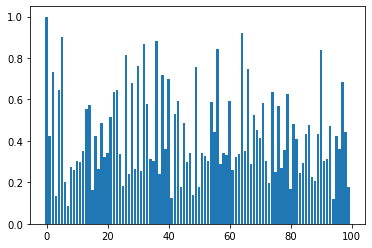

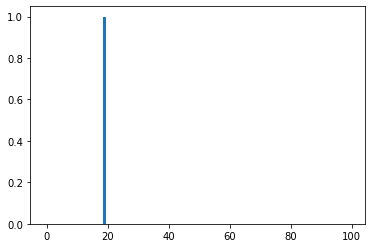

In [91]:
def check_maps(maps,z):
    histograms = []
    max_values = []
    max_indcies = []

    for m in maps:
        h = build_histogram(z,m); histograms.append(h)
        idx, max = find_maximum(h); max_values.append(max); max_indcies.append(idx)
    return histograms, max_values, max_indcies

# def test_results(low,high,difference,max_values):
#     x = list(range(low,high,difference))
#     h = [0] * len(x)
#     for value in max_values:
#         if value > low and value < high:
#             h[] += 1
#     return histogram

def find_difference(max_idx,z,M):
    diff = [" "] * len(z)
    for i in range(len(z)):
        x = (max_idx+i+1) %len(M)
        if M[x] == z[i]:
            diff[i] = z[i]
        else:
            diff[i] = "❌"
    return diff

histograms, max_values, max_indcies = check_maps(maps,z)
bestFit, _ = find_maximum(max_values)
print(bestFit); print(max_indcies[bestFit])
print(find_difference(max_indcies[bestFit],z,maps[bestFit]))
show_histogram(range(len(max_values)),max_values)
show_histogram(range(len(histograms[bestFit])),histograms[bestFit])